# Retail Transactions - Statistical Analysis
![img](img/img.png)
## Dataset Description :
* Customer Information:

    * CustomerID: A unique identifier for each customer. This allows you to track customer behavior across multiple transactions.
* Transaction Details:

    * ProductID: A unique identifier for each product sold. This allows you to analyze product-specific trends.

    * Quantity: The number of units of each product purchased in a single transaction.

    * Price: The unit price of each product.

    * TransactionDate: The date and potentially time of each transaction. This allows for analysis of temporal trends like seasonality.

    * PaymentMethod: The method used by the customer to pay for the transaction (e.g., credit card, debit card, cash). This can be useful for understanding customer preferences and optimizing payment options.
    StoreLocation: The location of the store where the transaction took place (e.g., city, branch). This allows for analysis of location-specific trends.

* Product Information:

    * ProductCategory: The category the product belongs to (e.g., clothing, electronics, furniture). This facilitates product grouping and analysis by category.

* Promotional Information:

    * DiscountApplied(%): The percentage discount applied to the transaction, if any. This allows you to assess the impact of promotions and discounts.

* Financial Information:

    * TotalAmount: The total amount paid for the transaction, considering any discounts applied. This is a crucial metric for revenue analysis.

## Data Exploration

In [1]:
setwd('data/')

In [2]:
data <- read.csv("Retail_Transaction_Dataset.csv")
head(data)

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied...,TotalAmount
,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,109318,C,7,80.07984,12/26/2023 12:32,Cash,"176 Andrew Cliffs Baileyfort, HI 93354",Books,18.677100,455.8628
2,993229,C,4,75.19523,8/5/2023 0:00,Cash,"11635 William Well Suite 809 East Kara, MT 19483",Home Decor,14.121365,258.3065
3,579675,A,8,31.52882,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909 Port Lauraland, MO 99563",Books,15.943701,212.0157
4,799826,D,5,98.88022,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500 Lake Tammy, MO 76234",Books,6.686337,461.3438
5,121413,A,7,93.18851,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143 Holand, VA 80142",Electronics,4.030096,626.0305
6,463050,D,3,54.09315,8/15/2023 4:24,Cash,"8492 Jonathan Drive North Robertshire, TN 67532",Electronics,10.888768,144.6092


**Types of the columns**

In [3]:
str(data)

'data.frame':	100000 obs. of  10 variables:
 $ CustomerID        : int  109318 993229 579675 799826 121413 463050 888163 843385 839609 184135 ...
 $ ProductID         : chr  "C" "C" "A" "D" ...
 $ Quantity          : int  7 4 8 5 7 3 7 8 5 4 ...
 $ Price             : num  80.1 75.2 31.5 98.9 93.2 ...
 $ TransactionDate   : chr  "12/26/2023 12:32" "8/5/2023 0:00" "3/11/2024 18:51" "10/27/2023 22:00" ...
 $ PaymentMethod     : chr  "Cash" "Cash" "Cash" "PayPal" ...
 $ StoreLocation     : chr  "176 Andrew Cliffs\nBaileyfort, HI 93354" "11635 William Well Suite 809\nEast Kara, MT 19483" "910 Mendez Ville Suite 909\nPort Lauraland, MO 99563" "87522 Sharon Corners Suite 500\nLake Tammy, MO 76234" ...
 $ ProductCategory   : chr  "Books" "Home Decor" "Books" "Books" ...
 $ DiscountApplied...: num  18.68 14.12 15.94 6.69 4.03 ...
 $ TotalAmount       : num  456 258 212 461 626 ...


We have only one column with a false type which is $TransactionDate.

Let's fix it.

In [4]:
data$TransactionDate <- as.POSIXct(strptime(data$TransactionDate, format = "%m/%d/%Y %H:%M", tz = "UTC"))

In [5]:
head(data)

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied...,TotalAmount
,<int>,<chr>,<int>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,109318,C,7,80.07984,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs Baileyfort, HI 93354",Books,18.677100,455.8628
2,993229,C,4,75.19523,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809 East Kara, MT 19483",Home Decor,14.121365,258.3065
3,579675,A,8,31.52882,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909 Port Lauraland, MO 99563",Books,15.943701,212.0157
4,799826,D,5,98.88022,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500 Lake Tammy, MO 76234",Books,6.686337,461.3438
5,121413,A,7,93.18851,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143 Holand, VA 80142",Electronics,4.030096,626.0305
6,463050,D,3,54.09315,2023-08-15 04:24:00,Cash,"8492 Jonathan Drive North Robertshire, TN 67532",Electronics,10.888768,144.6092


In [6]:
class(data$TransactionDate)

[1] "POSIXct" "POSIXt"

**Basic Descriptive Statistics**

In [7]:
summary(data)

   CustomerID      ProductID            Quantity         Price       
 Min.   :    14   Length:100000      Min.   :1.000   Min.   : 10.00  
 1st Qu.:250694   Class :character   1st Qu.:3.000   1st Qu.: 32.55  
 Median :499679   Mode  :character   Median :5.000   Median : 55.12  
 Mean   :500464                      Mean   :5.009   Mean   : 55.07  
 3rd Qu.:751105                      3rd Qu.:7.000   3rd Qu.: 77.46  
 Max.   :999997                      Max.   :9.000   Max.   :100.00  
 TransactionDate                  PaymentMethod      StoreLocation     
 Min.   :2023-04-29 22:27:00.00   Length:100000      Length:100000     
 1st Qu.:2023-07-30 06:45:15.00   Class :character   Class :character  
 Median :2023-10-30 05:12:30.00   Mode  :character   Mode  :character  
 Mean   :2023-10-29 15:40:05.47                                        
 3rd Qu.:2024-01-29 05:44:00.00                                        
 Max.   :2024-04-28 22:22:00.00                                        
 Produ

Now , we explored our data briefly and cleaned a bit .

Let's dive into analysis .

## Exploratory Data Analysis (EDA)

In [8]:
install.packages("ggplot2", dependencies=TRUE)
install.packages("magrittr", dependencies=TRUE)
install.packages("dplyr", dependencies=TRUE)
install.packages("matrixStats", dependencies=TRUE)
install.packages("corrplot", dependencies=TRUE)

Installing package into 'C:/Users/Harou/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'sf'


Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 26165248 != reported length 39897927"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.4/sf_1.0-16.zip': Timeout of 60 seconds was reached"


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/bin/windows/contrib/4.4/sf_1.0-16.zip' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'sf' failed"


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Harou\AppData\Local\Temp\Rtmp4w9Z0F\downloaded_packages


Installing package into 'C:/Users/Harou/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Harou\AppData\Local\R\win-library\4.4\00LOCK\magrittr\libs\x64\magrittr.dll to C:\Users\Harou\AppData\Local\R\win-library\4.4\magrittr\libs\x64\magrittr.dll: Permission denied"
Warning message:
"restored 'magrittr'"



The downloaded binary packages are in
	C:\Users\Harou\AppData\Local\Temp\Rtmp4w9Z0F\downloaded_packages


Installing package into 'C:/Users/Harou/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Harou\AppData\Local\R\win-library\4.4\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\Harou\AppData\Local\R\win-library\4.4\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\Harou\AppData\Local\Temp\Rtmp4w9Z0F\downloaded_packages


Installing package into 'C:/Users/Harou/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'matrixStats' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'matrixStats'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Harou\AppData\Local\R\win-library\4.4\00LOCK\matrixStats\libs\x64\matrixStats.dll to C:\Users\Harou\AppData\Local\R\win-library\4.4\matrixStats\libs\x64\matrixStats.dll: Permission denied"
Warning message:
"restored 'matrixStats'"



The downloaded binary packages are in
	C:\Users\Harou\AppData\Local\Temp\Rtmp4w9Z0F\downloaded_packages


Installing package into 'C:/Users/Harou/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'iterators', 'permute', 'ca', 'foreach', 'gclus', 'qap', 'registry', 'TSP', 'vegan', 'seriation', 'prettydoc'




package 'iterators' successfully unpacked and MD5 sums checked
package 'permute' successfully unpacked and MD5 sums checked
package 'ca' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'vegan' successfully unpacked and MD5 sums checked
package 'seriation' successfully unpacked and MD5 sums checked
package 'prettydoc' successfully unpacked and MD5 sums checked
package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Harou\AppData\Local\Temp\Rtmp4w9Z0F\downloaded_packages


In [9]:
library(ggplot2)
library(magrittr)
library(dplyr)
library(lubridate)
library(matrixStats)
library(corrplot)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count


corrplot 0.92 loaded



**Product Category Distribution**

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


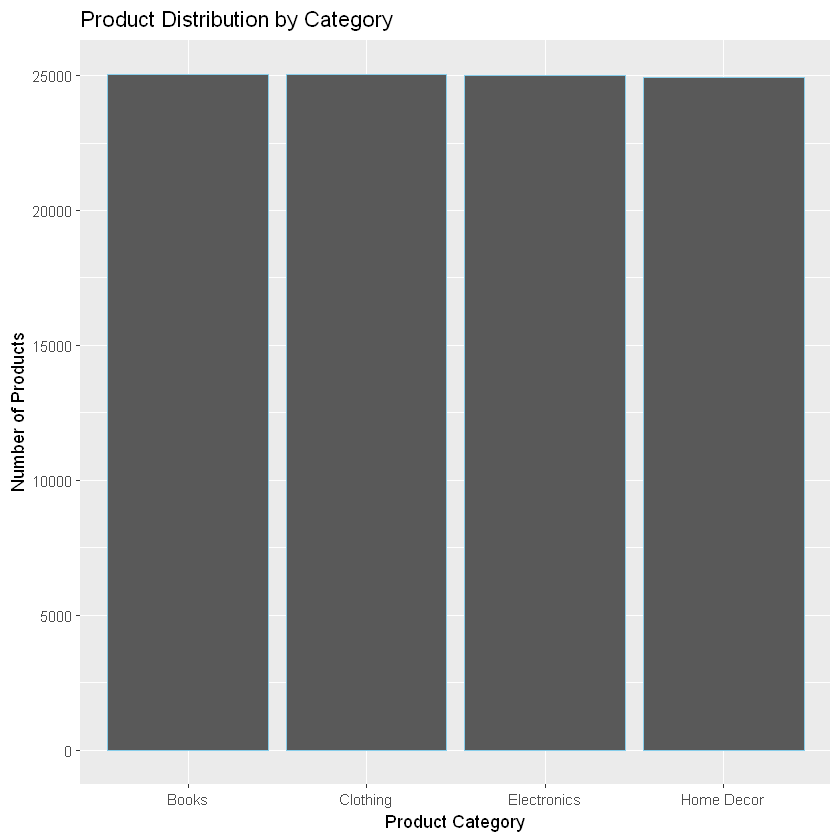

In [10]:
ggplot(data, aes(x = ProductCategory, y = ..count..)) +  
  geom_bar(stat = "count", color = "skyblue") +  
  labs(title = "Product Distribution by Category", x = "Product Category", y = "Number of Products")

***---> Evenly distributed***

**Price Distribution**

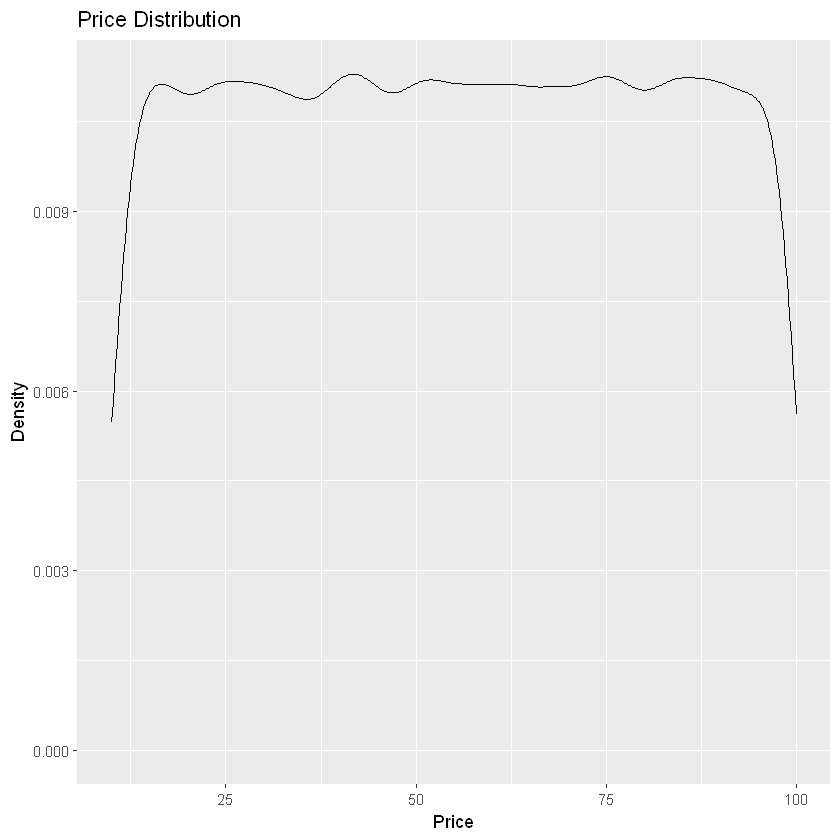

In [11]:
ggplot(data, aes(x = Price, y = after_stat(density))) +  
  geom_density(alpha = 0.5) +  
  labs(title = "Price Distribution", x = "Price", y = "Density")

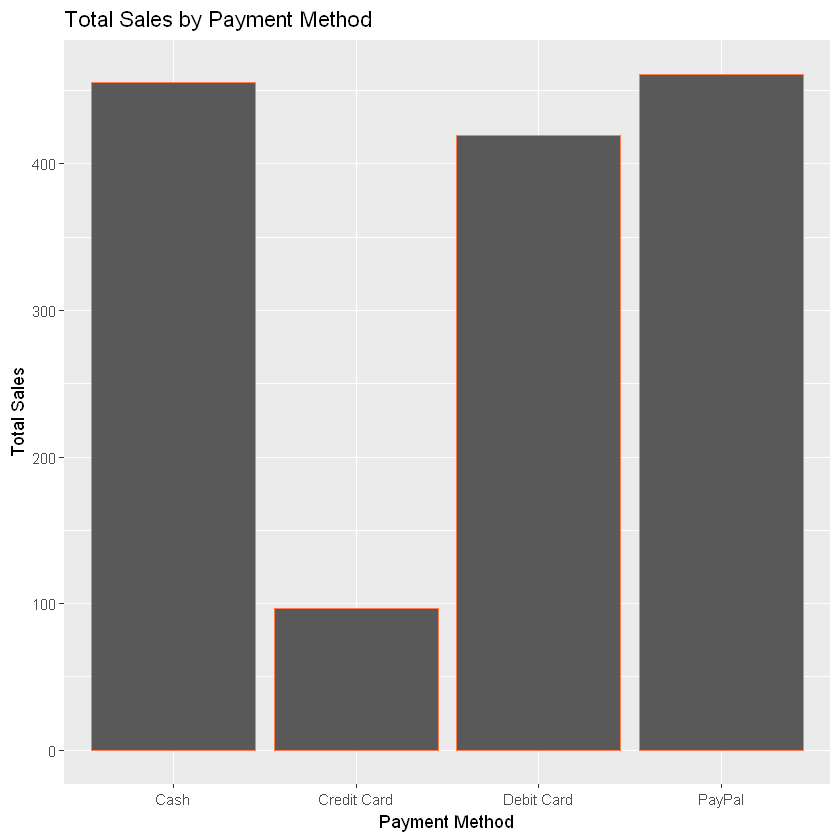

In [12]:
data %>%
  group_by(PaymentMethod) %>%
  summarise(total_sales = sum(ifelse(is.numeric(TotalAmount), TotalAmount, 0))) %>%  
  arrange(desc(total_sales)) %>%  
  ggplot(aes(x = PaymentMethod, y = total_sales)) +
  geom_bar(stat = "identity", color = "coral") +
  labs(title = "Total Sales by Payment Method", x = "Payment Method", y = "Total Sales")


***---> Credit cards are the lezast used in payments.***

**Transactions by day of week**

Warning message:
" 74 failed to parse."


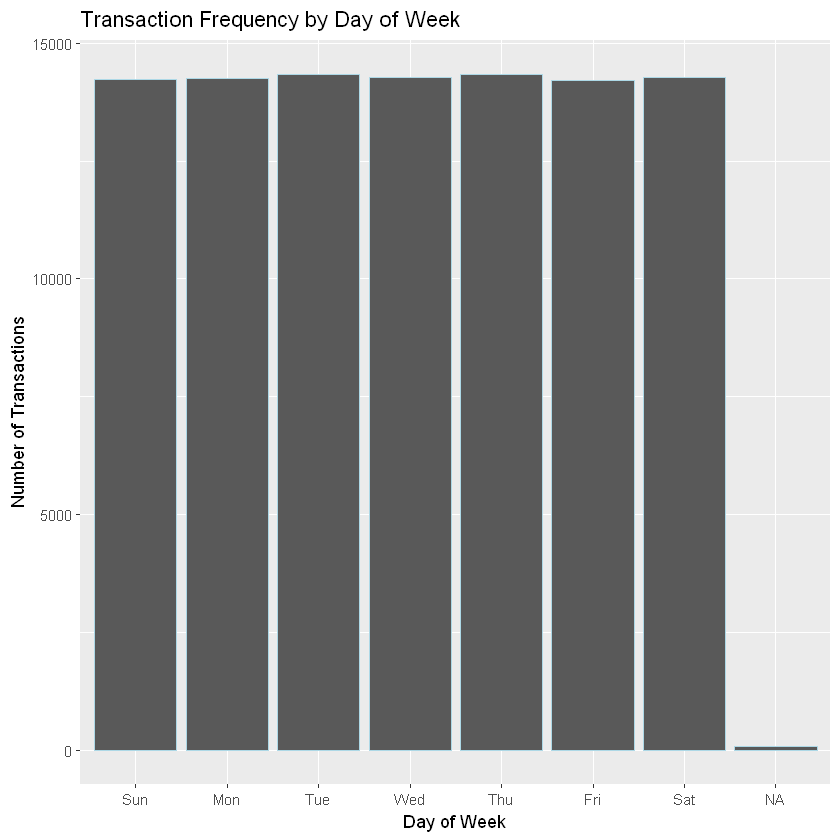

In [13]:
data$TransactionDate <- ymd_hms(data$TransactionDate) 
data$Weekday <- weekdays(data$TransactionDate) 

transactions_by_day <- data %>%
  group_by(Weekday) %>%
  summarise(n_transactions = n()) %>%
  arrange(Weekday)

ggplot(transactions_by_day, aes(x = Weekday, y = n_transactions)) +
  geom_bar(stat = "identity", color = "lightblue") +
  labs(title = "Transaction Frequency by Day of Week", x = "Day of Week", y = "Number of Transactions") +
  scale_x_discrete(labels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")) 


***---> We see an even distribution, I doubt about this data unless more information is given.***

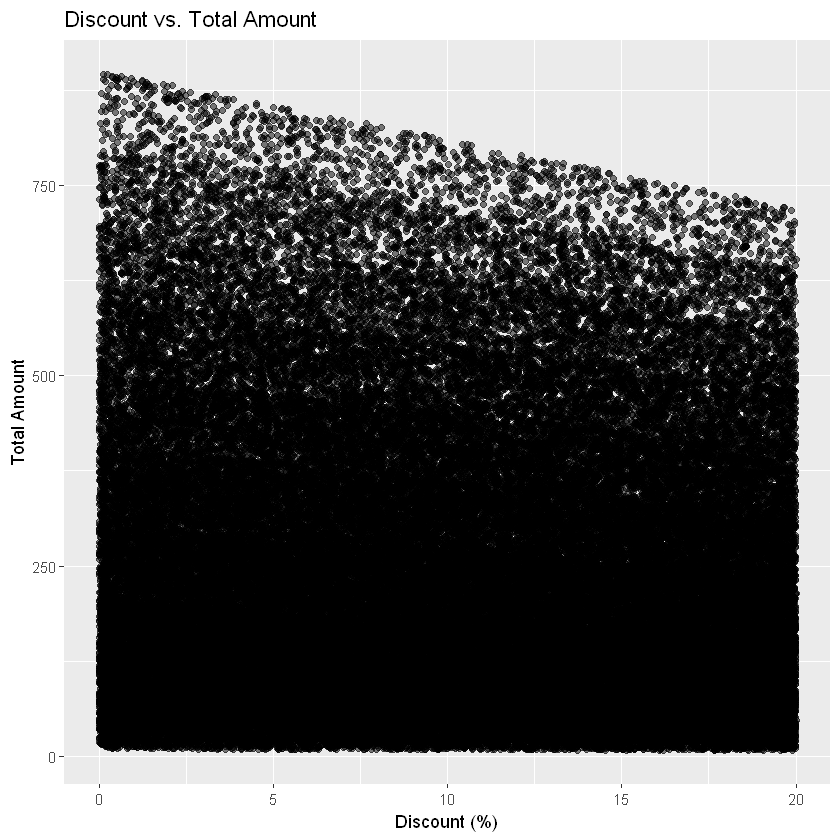

In [14]:
ggplot(data, aes(x = DiscountApplied..., y = TotalAmount)) +
  geom_point(alpha = 0.5) +  
  labs(title = "Discount vs. Total Amount", x = "Discount (%)", y = "Total Amount")

**Total Amount Analysis**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.275  95.163 200.368 248.335 362.010 896.141 

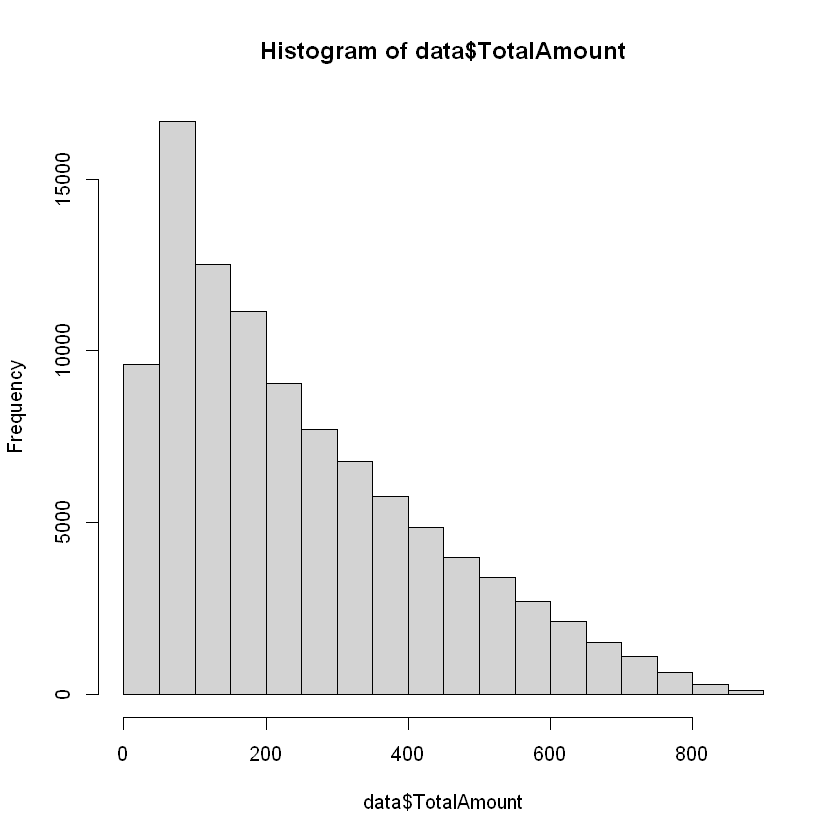

In [15]:
summary(data$TotalAmount)
hist(data$TotalAmount) 

**Top selling products**

In [16]:
n_unique_products <- length(unique(data$ProductID))
top_selling_products <- data %>%
  group_by(ProductID) %>%
  summarize(TotalQuantitySold = sum(Quantity)) %>%
  arrange(desc(TotalQuantitySold))
top_selling_products

ProductID,TotalQuantitySold
<chr>,<int>
C,125978
D,125786
B,125070
A,124095


**Top categories sold**

In [17]:
top_categories <- data %>%
  group_by(ProductCategory) %>%
  summarize(TotalQuantitySold = sum(Quantity), TotalRevenue = sum(TotalAmount)) %>%
  arrange(desc(TotalRevenue)) %>%
  head(5) 
top_categories

ProductCategory,TotalQuantitySold,TotalRevenue
<chr>,<int>,<dbl>
Books,126047,6257837
Clothing,125044,6205502
Electronics,125347,6196735
Home Decor,124491,6173421


In [20]:
correlation_matrix <- cor(data[, c("Price", "Quantity", "TotalAmount")])
correlation_matrix

,Price,Quantity,TotalAmount
Price,1.000000000,0.001786576,0.6362936
Quantity,0.001786576,1.000000000,0.6918469
TotalAmount,0.636293607,0.691846855,1.0000000


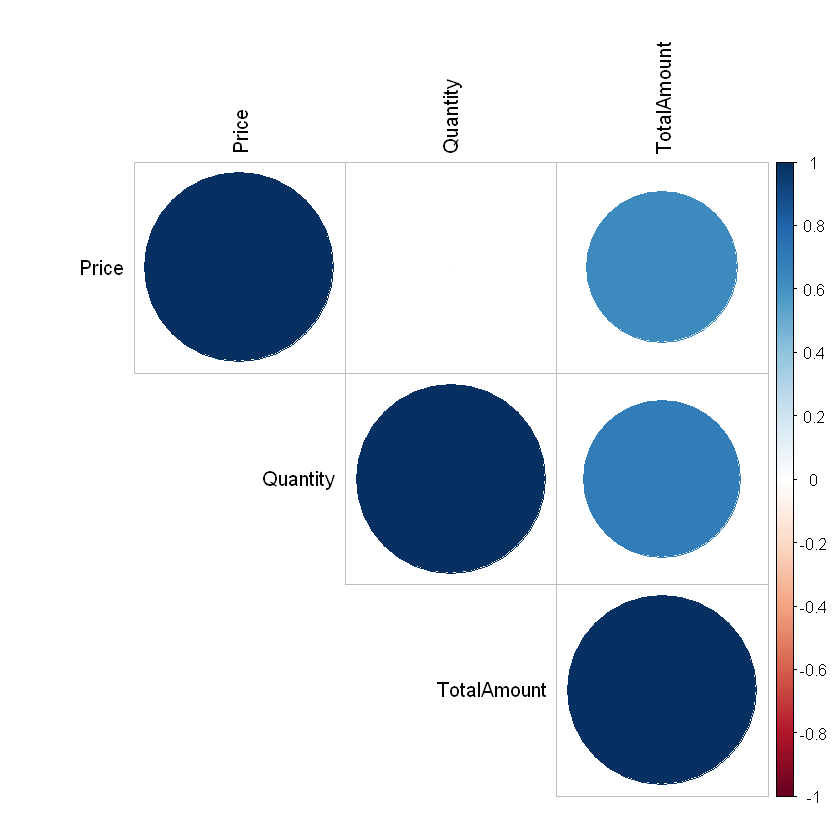

In [21]:
corrplot(correlation_matrix, method = "circle", type = "upper", tl.col = "black")

***---> Price and Quantity are not correlated at all.***

## Statistical Tests

### 1. ANOVA (Analysis of Variance)

In [22]:
anova_result <- aov(TotalAmount ~ ProductCategory, data = data)
summary(anova_result)

                   Df    Sum Sq Mean Sq F value Pr(>F)
ProductCategory     3 9.433e+04   31444   0.923  0.429
Residuals       99996 3.406e+09   34061               

***---> Since the p-value (0.429) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is no significant difference in TotalAmount across different levels of ProductCategory. Therefore, we do not have enough evidence to conclude that ProductCategory has a significant effect on TotalAmount.***

### 2. Chi-Square

In [23]:
chisq_result <- chisq.test(table(data$PaymentMethod, data$ProductCategory))
chisq_result


	Pearson's Chi-squared test

data:  table(data$PaymentMethod, data$ProductCategory)
X-squared = 8.6724, df = 9, p-value = 0.468


***---> Since the p-value (0.468) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is no significant association between PaymentMethod and ProductCategory. In other words, PaymentMethod and ProductCategory are independent of each other based on the available data.***

### 3. Pearson Correlation

In [24]:
cor_test <- cor.test(data$Quantity, data$TotalAmount)
cor_test


	Pearson's product-moment correlation

data:  data$Quantity and data$TotalAmount
t = 303, df = 99998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6886016 0.6950644
sample estimates:
      cor 
0.6918469 


***---> Since the p-value is extremely small (much smaller than the typical significance level of 0.05), we reject the null hypothesis. This suggests that there is a statistically significant positive correlation between Quantity and TotalAmount. In other words, as the quantity of items purchased increases, the total amount spent also tends to increase. The correlation coefficient of approximately 0.692 indicates a strong positive linear relationship between Quantity and TotalAmount.***

### 4. T-Test

In [26]:
unique_payment_methods <- unique(data$PaymentMethod)

t_test_results <- list()

# Perform t-tests for each pair of payment methods
for (i in 1:(length(unique_payment_methods)-1)) {
  for (j in (i+1):length(unique_payment_methods)) {
    method1 <- unique_payment_methods[i]
    method2 <- unique_payment_methods[j]
    
    subset_data <- data[data$PaymentMethod %in% c(method1, method2),]
    
    # Perform t-test
    t_test_result <- t.test(TotalAmount ~ PaymentMethod, data = subset_data)
    
    t_test_results[[paste(method1, method2, sep = "_vs_")]] <- t_test_result
  }
}

# Print the results
for (key in names(t_test_results)) {
  cat(key, "\n")
  print(t_test_results[[key]])
  cat("\n")
}


Cash_vs_PayPal 

	Welch Two Sample t-test

data:  TotalAmount by PaymentMethod
t = 0.050607, df = 50072, p-value = 0.9596
alternative hypothesis: true difference in means between group Cash and group PayPal is not equal to 0
95 percent confidence interval:
 -3.157009  3.324355
sample estimates:
  mean in group Cash mean in group PayPal 
            248.2088             248.1251 


Cash_vs_Debit Card 

	Welch Two Sample t-test

data:  TotalAmount by PaymentMethod
t = -0.60367, df = 49895, p-value = 0.5461
alternative hypothesis: true difference in means between group Cash and group Debit Card is not equal to 0
95 percent confidence interval:
 -4.236985  2.241619
sample estimates:
      mean in group Cash mean in group Debit Card 
                248.2088                 249.2065 


Cash_vs_Credit Card 

	Welch Two Sample t-test

data:  TotalAmount by PaymentMethod
t = 0.24587, df = 50038, p-value = 0.8058
alternative hypothesis: true difference in means between group Cash and group Cred

***--->*** 
* Cash_vs_PayPal:
t = 0.050607, df = 50072, p-value = 0.9596
There is no significant difference in the mean TotalAmount between the Cash and PayPal payment methods. The p-value is 0.9596, indicating that the difference is not statistically significant at the typical significance level of 0.05.

* Cash_vs_Debit Card:
t = -0.60367, df = 49895, p-value = 0.5461
There is no significant difference in the mean TotalAmount between the Cash and Debit Card payment methods. The p-value is 0.5461, indicating that the difference is not statistically significant at the typical significance level of 0.05.

* Cash_vs_Credit Card:
t = 0.24587, df = 50038, p-value = 0.8058
There is no significant difference in the mean TotalAmount between the Cash and Credit Card payment methods. The p-value is 0.8058, indicating that the difference is not statistically significant at the typical significance level of 0.05.

* PayPal_vs_Debit Card:
t = 0.65259, df = 49956, p-value = 0.514
There is no significant difference in the mean TotalAmount between the PayPal and Debit Card payment methods. The p-value is 0.514, indicating that the difference is not statistically significant at the typical significance level of 0.05.

* PayPal_vs_Credit Card:
t = -0.19447, df = 50094, p-value = 0.8458
There is no significant difference in the mean TotalAmount between the PayPal and Credit Card payment methods. The p-value is 0.8458, indicating that the difference is not statistically significant at the typical significance level of 0.05.

***In summary, based on these t-tests, there is no significant difference in the mean TotalAmount between any pairs of the PaymentMethods (Cash, PayPal, Debit Card, and Credit Card).***

## Time Series Forecasting (BONUS-for more analysis)

In [30]:
install.packages("forecast", dependencies=TRUE)

Installing package into 'C:/Users/Harou/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



also installing the dependencies 'xts', 'TTR', 'quantmod', 'x13binary', 'fracdiff', 'lmtest', 'timeDate', 'tseries', 'urca', 'RcppArmadillo', 'forecTheta', 'rticles', 'seasonal', 'uroot'





  There is a binary version available but the source version is later:
                  binary     source needs_compilation
RcppArmadillo 0.12.8.2.1 0.12.8.3.0              TRUE

  Binaries will be installed


Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 1851392 != reported length 1887745"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.4/x13binary_1.1.60.zip': Timeout of 60 seconds was reached"


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/bin/windows/contrib/4.4/x13binary_1.1.60.zip' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'x13binary' failed"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 753664 != reported length 2062415"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.4/RcppArmadillo_0.12.8.2.1.zip': Timeout of 60 seconds was reached"


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/bin/windows/contrib/4.4/RcppArmadillo_0.12.8.2.1.zip' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'RcppArmadillo' failed"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 720896 != reported length 5418541"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.4/rticles_0.27.zip': Timeout of 60 seconds was reached"


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/bin/windows/contrib/4.4/rticles_0.27.zip' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'rticles' failed"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 1277952 != reported length 1926604"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.4/uroot_2.1-3.zip': Timeout of 60 seconds was reached"


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/bin/windows/contrib/4.4/uroot_2.1-3.zip' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'uroot' failed"


package 'xts' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'forecTheta' successfully unpacked and MD5 sums checked
package 'seasonal' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Harou\AppData\Local\Temp\Rtmp4w9Z0F\downloaded_packages


In [31]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



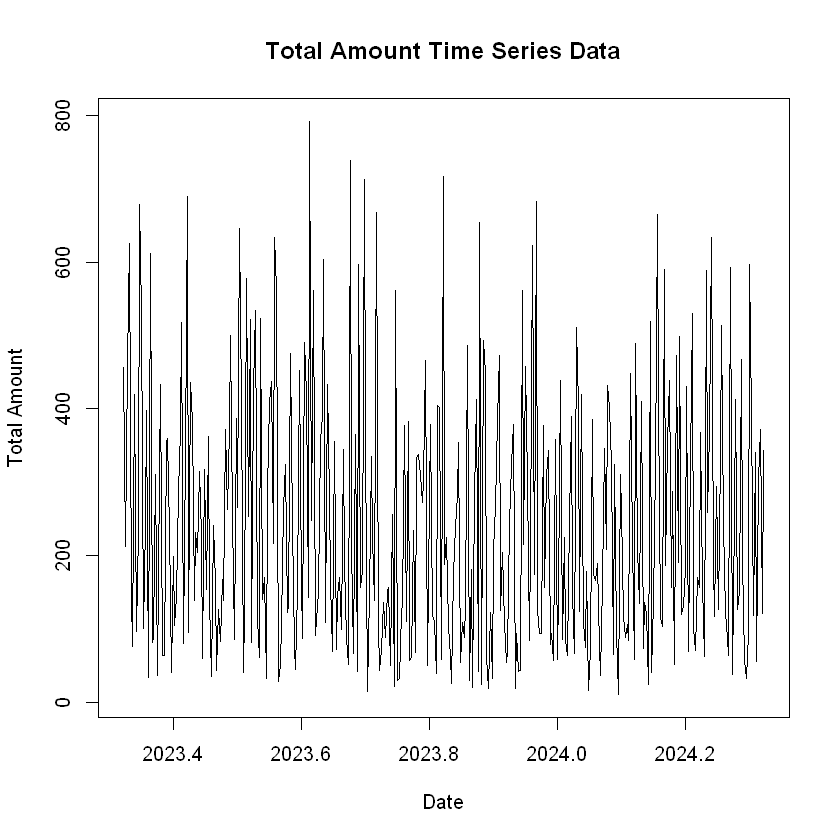

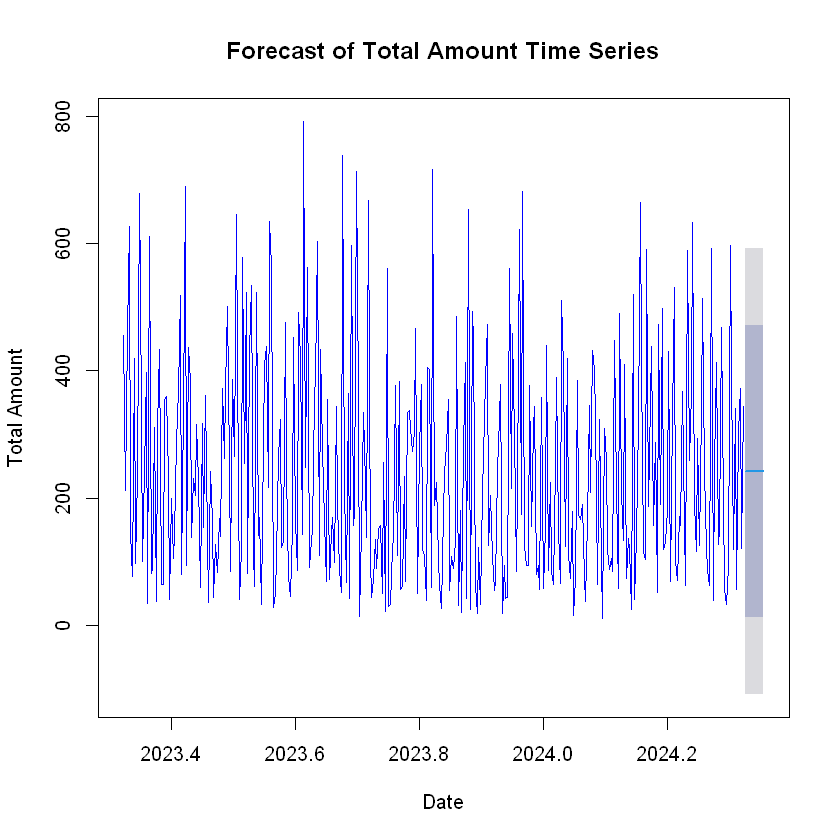

In [48]:
data$TransactionDate <- as.Date(data$TransactionDate)

data <- na.omit(data)

# Create a time series object using TotalAmount and TransactionDate
ts_data <- ts(data$TotalAmount, start = c(year(min(data$TransactionDate)), as.numeric(format(min(data$TransactionDate), "%j"))), 
              end = c(year(max(data$TransactionDate)), as.numeric(format(max(data$TransactionDate), "%j"))), frequency=365)

plot(ts_data, main = "Total Amount Time Series Data", xlab = "Date", ylab = "Total Amount")

# Forecast future values using the "naive" method
forecast_ts <- forecast(ts_data, h = 12)

plot(forecast_ts, main = "Forecast of Total Amount Time Series", xlab = "Date", ylab = "Total Amount")
lines(ts_data, col = "blue")  

In [49]:
accuracy(forecast_ts)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.1745416,178.3914,150.6582,-115.5408,147.2017,1.343571,-0.07799503


![mhz](./img/mhz.png)